Building prefix dict from C:\Users\USER\AI Python\201104_wordcloud2\dict.txt.big.txt ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.u9419b4b849b2b6a4f16a51ff965cf7cf.cache
Loading model cost 0.414 seconds.
Prefix dict has been built successfully.


Counter({'\n': 385, ' ': 313, '遙控': 104, '無人機': 87, '申請': 56, '操作': 50, '民航局': 50, '活動': 47, '飛航': 43, '條': 42, '應': 42, '操作證': 35, '檢驗': 33, '人': 31, '政府': 31, '機關': 26, '後': 24, '規定': 23, '第一項': 22, '從事': 21, '檢附': 21, '文件': 20, '重量': 19, '前': 19, '附件': 19, '註冊': 17, '構': 17, '起飛': 16, '學校': 16, '法人': 16, '測驗': 16, '製造': 15, '相關': 15, '區域': 14, '以上': 14, '指定': 14, '合格證': 14, '時': 14, '系統': 13, '資訊': 13, '下列': 13, '公斤': 13, '限制': 13, '合格': 13, '設備': 12, '設計': 11, '範圍': 11, '安全': 11, '證明': 11, '改裝': 11, '發給': 11, '實體': 11, '同意': 11, '規則': 10, '無人': 10, '法第': 10, '公告': 9, '所有人': 9, '申請書': 9, '九十九條': 9, '認可': 9, '無': 8, '所有': 8, '其所': 8, '前項': 8, '發生': 8, '三十日': 8, '及第': 8, '直轄市': 8, '縣': 8, '市': 8, '專業': 8, '術科': 8, '管理': 7, '章': 7, '自然人': 7, '應由': 7, '有效期限': 7, '裝置': 7, '符合': 7, '型式': 7, '核准': 7, '持有人': 7, '許可': 7, '災害': 7, '號碼': 6, '始得': 6, '十五日': 6, '二年': 6, '導航': 6, '之十三': 6, '登錄': 6, '試飛': 6, '事件': 6, '月': 5, '日': 5, '指': 5, '中': 5, '資料': 5, '目視': 5, '提供': 5, '最大': 5, '構造': 5, '變更'

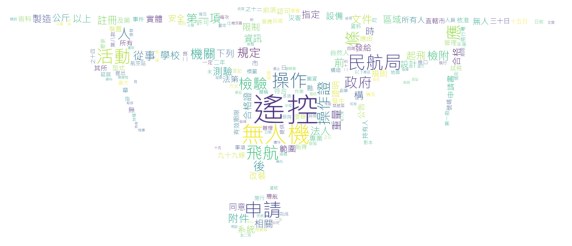

In [5]:
# WordCloud  文字雲

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

text = open('drone.txt', "r",encoding="utf-8").read()  #讀文字資料
 
jieba.set_dictionary('dict.txt.big.txt')
with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)

# 可列印詞的統計數量
print(diction)


font = "C:\Windows\Fonts\msjhl.ttc"  #設定字型
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("Drone.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("Drone_Wordcloud.png")  #存檔